# Confidence Intervals in Data Analytics


Implement the 4 steps that we learnt regarding distributions namely:

1. Understand the Data Type: Continuous or discrete.
2. Identify the Analytical Question: Determine which distribution fits your question.
3. Calculate Descriptive Statistics: Compute and visualize summary statistics.
4. Interpret the Graph and Descriptive Statistics: Analyze the data’s distribution and patterns.

To ultimately calculate the CI.

Keep in mind to check the following when selecting the method to calculate CI:

- Sample Size
- Population Parameters are known or unknown

---

# Case Study 1:

Scenario:
A tech company has introduced a new smartphone model. The battery life (in hours) of the smartphone is a key feature, and the company conducted a test on a sample of 50 units. The battery life data from this test is normally distributed. However, since this is a new product, the population mean and standard deviation of battery life are unknown.

Your task is to calculate the 95% confidence interval for the mean battery life of the smartphone.

Dataset: battery_life

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
battery_life = pd.read_csv("./data/battery_life.csv")

battery_life.head()

,BatteryLife
0,10.993428
1,9.723471
2,11.295377
3,13.046060
4,9.531693


In [20]:
float(battery_life.min())

/var/folders/4_/035xbnzn0tg0vjl3_4ppd7g40000gn/T/ipykernel_54965/471123339.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(battery_life.min())


6.080659752240448

In [5]:
battery_life.max()

BatteryLife    13.704556
dtype: float64

In [6]:
battery_life.mean()

BatteryLife    9.549052
dtype: float64

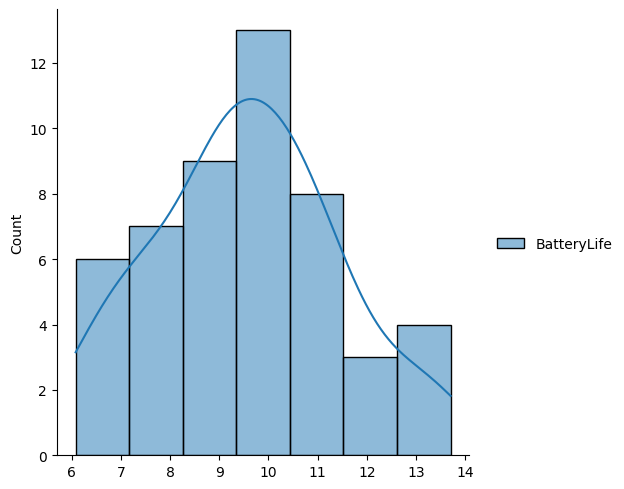

In [7]:
sns.displot(battery_life, kde=True);


In [8]:
clvl = 0.95

lower_quantile = (1-clvl)/2  

upper_qunatile = clvl + ((1-clvl)/2)

print(clvl, lower_quantile, upper_qunatile)

0.95 0.025000000000000022 0.975


In [9]:

lower_limit = battery_life.quantile(lower_quantile)

upper_limit = battery_life.quantile(upper_qunatile)

print(f'The Confidence Interval of the average battery life is between {lower_limit} and {upper_limit}')

The Confidence Interval of the average battery life is between BatteryLife    6.241048
Name: 0.025000000000000022, dtype: float64 and BatteryLife    13.133143
Name: 0.975, dtype: float64


---

# Case Study 2:

Scenario:
A call center wants to estimate the average number of calls received per hour. A random sample of 40 hours is selected, and the number of calls received each hour is recorded. The number of calls follows a Poisson distribution, as it is a count of events within a fixed period. The population mean and variance are unknown.

Your task is to calculate the 95% confidence interval for the mean number of calls received per hour.

Dataset: calls_per_hour


In [10]:
calls_per_hour = pd.read_csv("./data/calls_per_hour.csv")

calls_per_hour.head()

,CallsPerHour
0,5
1,4
2,4
3,5
4,5


In [11]:
calls_per_hour.min()

CallsPerHour    1
dtype: int64

In [12]:
calls_per_hour.max()

CallsPerHour    11
dtype: int64

In [13]:
calls_per_hour.mean().round(2)

CallsPerHour    4.92
dtype: float64

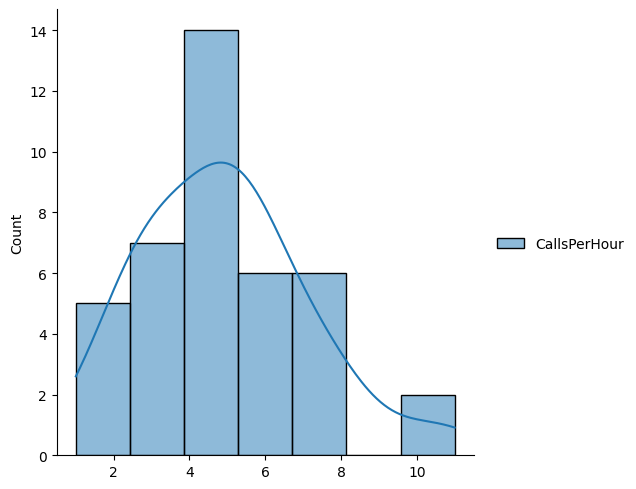

In [14]:
sns.displot(calls_per_hour, kde=True);


In [15]:
z = 1.96
n = len(calls_per_hour)

sample_mean = calls_per_hour.mean()
sample_std = calls_per_hour.std()

lower_limit_eq = sample_mean - ((z*sample_std) / np.sqrt(n))
upper_limit_eq = sample_mean + ((z*sample_std) / np.sqrt(n))

print(f'Calculated Confidence Interval of the average number of calls is between {lower_limit_eq} and {upper_limit_eq}')


Calculated Confidence Interval of the average number of calls is between CallsPerHour    4.239584
dtype: float64 and CallsPerHour    5.610416
dtype: float64


---

# Case Study 3: Interpreting Confidence Interval for Customer Satisfaction
Scenario:
You are a data analyst at a retail company, and your team conducted a survey to measure customer satisfaction with your online shopping platform. 

The survey asked customers to rate their overall satisfaction on a scale from 1 to 10, where 1 means "very dissatisfied" and 10 means "very satisfied."

After analyzing the responses from a random sample of 150 customers, the team calculated a 95% confidence interval for the mean satisfaction score, which is (7.2, 8.1).

```Task:
Your task is to interpret this confidence interval in the context of the survey results. Specifically, answer the following questions:

What does the confidence interval tell you about the average satisfaction score of all customers?

Can you confidently say that customers are generally satisfied with the online shopping platform? Why or why not?

How would you present these results to the company’s management team?
```

---

# Case Study 4: Interpreting Confidence Interval for Product Defect Rate
Scenario:
You work as a quality control analyst at a manufacturing company. 

Your team has been monitoring the defect rate of a specific product. 

Over the past month, you randomly inspected 500 units and found that the defect rate was calculated along with a 95% confidence interval for the true defect rate, which is (3.5%, 6.5%).

```Task:
Interpret this confidence interval within the context of quality control. Address the following questions:

What does the confidence interval tell you about the true defect rate of the product?

Can you confidently say that the defect rate is below the company's acceptable threshold of 5%? Why or why not?

How would you explain these results to the production team? 
```

# Case Study 5: Iris Data set
For the Iris data set, calculate the 95% confidence intervals for the mean of the Length of the petal of Iris Setosa feature using bootstrapping. Create a notebook in which following questions shall be solved:

1. Initialize empty list called sample_means
2. Create a for loop that will loop 10,000 times
3. In each iteration using the pandas method .sample() sample 100 profits with replacement
4. Also in that same iteration take the mean of these 100 samples and then append it to the sample_means list
5. Using sns.displot plot the distribution of the sample_means list
6. Convert sample_means list to pandas Series
7. Using pandas .quantile() calculate the upper (0.975) and lower (0.025) limits of the confidence interval of the sample_means Series

### Bonus

8. Calculate using the z-value formula
9. Compare to the results of the bootstrapping method

In [16]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [17]:
# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)


In [18]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [19]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
